In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

## Getting data and preprosessing it

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap = "binary")
    plt.title(y_train[i])
    plt.axis("off")
    plt.show()

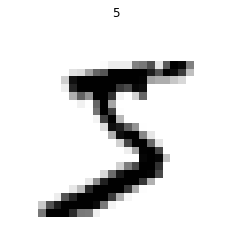

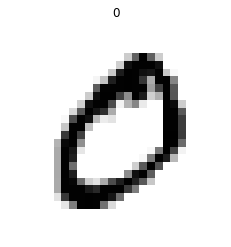

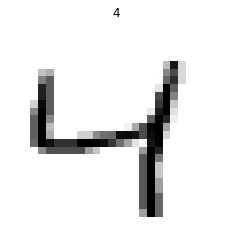

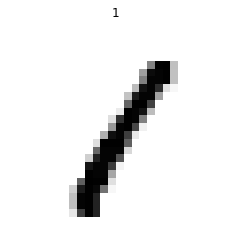

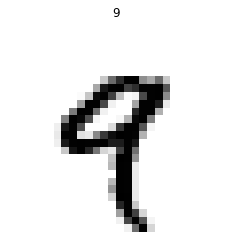

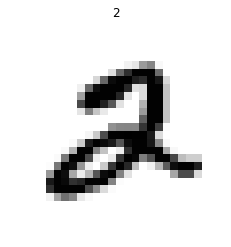

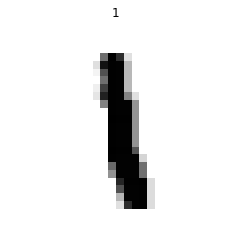

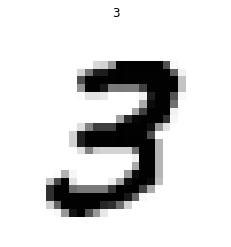

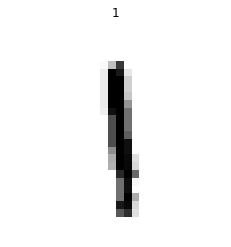

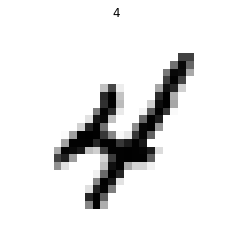

In [5]:
for i in range(10):
    plot_input_img(i)

In [6]:
# Preprosessing the images
# Normalizing the images to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

# Reshaping / Expanding the dimensions of images to (28,28,1)
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
## Converting classes to one hot vector
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation= "relu"))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation= "relu"))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation= "softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [11]:
model.compile(optimizer= "adam", loss = keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [12]:
# callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Earlystopping

es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)

# Model checkpoint

mc = ModelCheckpoint("./bestmodel.h5", monitor="val_acc", verbose=1, save_best_only=True)

cb = [es,mc]

# Model Training

In [13]:
his = model.fit(X_train,y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 33s 24ms/step - loss: 0.2201 - accuracy: 0.9345 - val_loss: 0.0842 - val_accuracy: 0.9738
Epoch 2/5
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0707 - accuracy: 0.9780 - val_loss: 0.0587 - val_accuracy: 0.9829
Epoch 3/5
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0549 - accuracy: 0.9829 - val_loss: 0.0537 - val_accuracy: 0.9837
Epoch 4/5
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0423 - accuracy: 0.9869 - val_loss: 0.0466 - val_accuracy: 0.9852
Epoch 5/5
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0349 - accuracy: 0.9895 - val_loss: 0.0472 - val_accuracy: 0.9864


In [14]:
model.save("C:\\Users\\shubh\\Desktop\\Project To Submit\\Models\\ModelP1.h5")

In [24]:
def predict_custom_img(img,model):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
    newimg = tf.keras.utils.normalize (resized, axis= 1)
    newimg = np.array(newimg).reshape(-1, 28, 28, 1)
    predictions = model.predict(newimg)
    print (np.argmax(predictions))

In [ ]:
#model2 = keras.models.load_model("EduDigitClassify")

In [17]:
import cv2

In [ ]:
#img=cv2.imread("Four.png")

In [ ]:
#plt.imshow(img)

In [ ]:
#predict_custom_img(img,model2)

In [18]:
img2=cv2.imread("C:\\Users\\shubh\\Desktop\\Project To Submit\\captured_images\\6\\7.png")

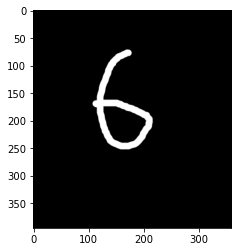

In [19]:
plt.imshow(img2)

In [21]:
import tensorflow as tf

In [22]:
model2 = tf.keras.models.load_model("C:\\Users\\shubh\\Desktop\\Project To Submit\\Models\\ModelP1.h5")

In [25]:
predict_custom_img(img2,model2)

1/1 [==============================] - 0s 97ms/step
5


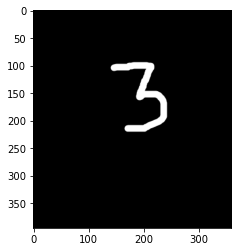

In [26]:
img2=cv2.imread("C:\\Users\\shubh\\Desktop\\Project To Submit\\captured_images\\3\\7.png")
plt.imshow(img2)

In [27]:
predict_custom_img(img2,model2)

1/1 [==============================] - 0s 19ms/step
3
